## Project name: Boston Housing Price Prediction ##

### By Daisy Z. ###

### Background ###

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

--CRIM - per capita crime rate by town

--ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

--INDUS - proportion of non-retail business acres per town.

--CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

--NOX - nitric oxides concentration (parts per 10 million)

--RM - average number of rooms per dwelling

--AGE - proportion of owner-occupied units built prior to 1940

--DIS - weighted distances to five Boston employment centres

--RAD - index of accessibility to radial highways

--TAX - full-value property-tax rate per $10,000

--PTRATIO - pupil-teacher ratio by town

--B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

--LSTAT - % lower status of the population

--MEDV - Median value of owner-occupied homes in $1000's

This project is to predict boston housing price based on variables stated above. 

The methodology contains various techniques, including but not limited to

--EDA

--Visualization

--Feature engineering and selection

--Regression models

### Data Importing and Brief Understanding ###

#### import library and dataset ####

In [6]:
# import pandas, numpy, matplotlib first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
# create a list of column containing all column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
                'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [8]:
# read csv file using pandas, adding delimiter, header columns
df_data = pd.read_csv('/Users/piggy/Desktop/Projects/Boston housing price 预测/housing.csv', delimiter=r"\s+",
                     header= None, names = column_names)

In [9]:
# check first 5 records of the dataset
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
# display various stats about the data
df_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# check number of rows and columns
df_data.shape

(506, 14)

In [12]:
# check column types of the data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
# check missing values for each columns
df_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

wow...what a data!!

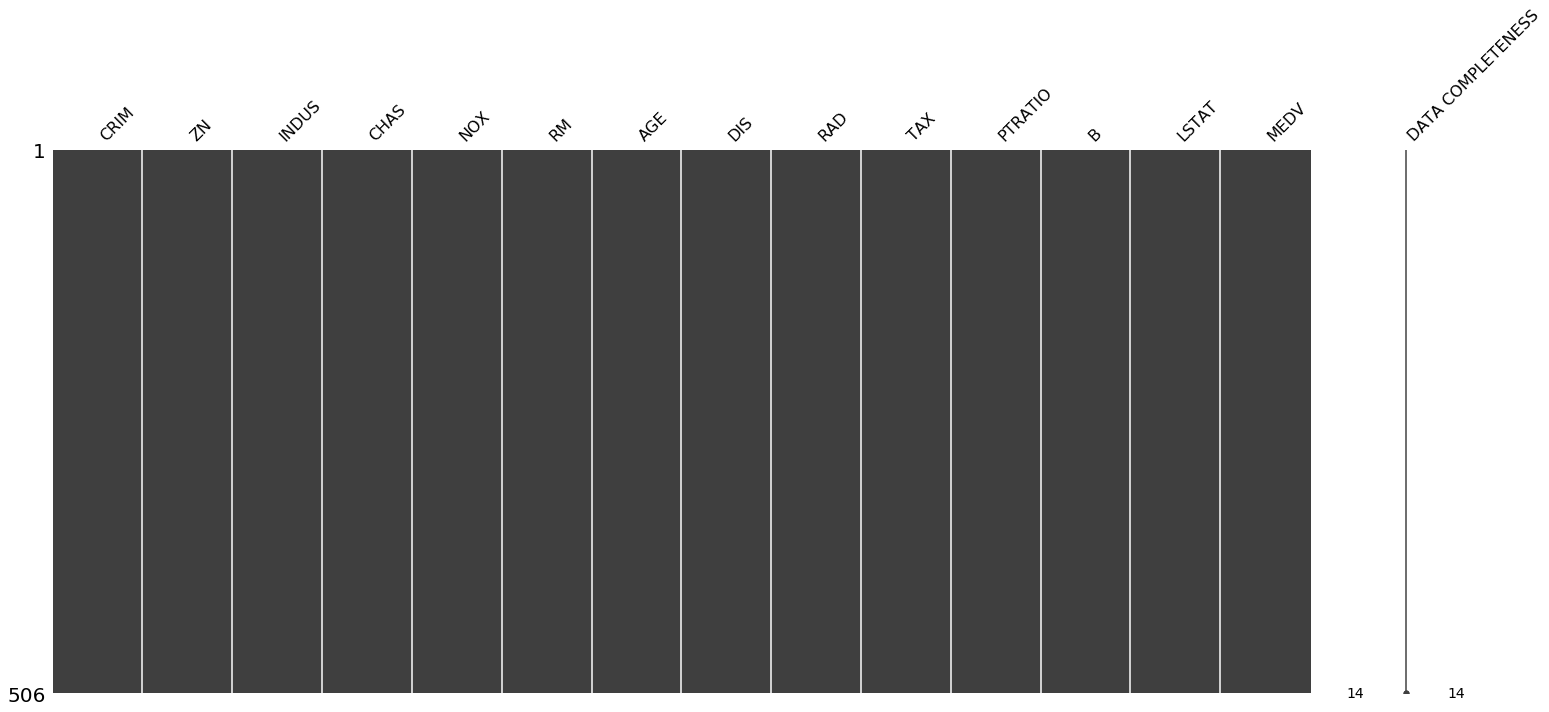

In [14]:
# another way (visualized) of checking missing values
import missingno as msno

msno.matrix(df_data, labels=True)

### Exploratory Data Analysis ###

Now we are going to deeply understand how features related, how each feature distributed,

and maybe determine which features we are going to choose for the modeling phase.

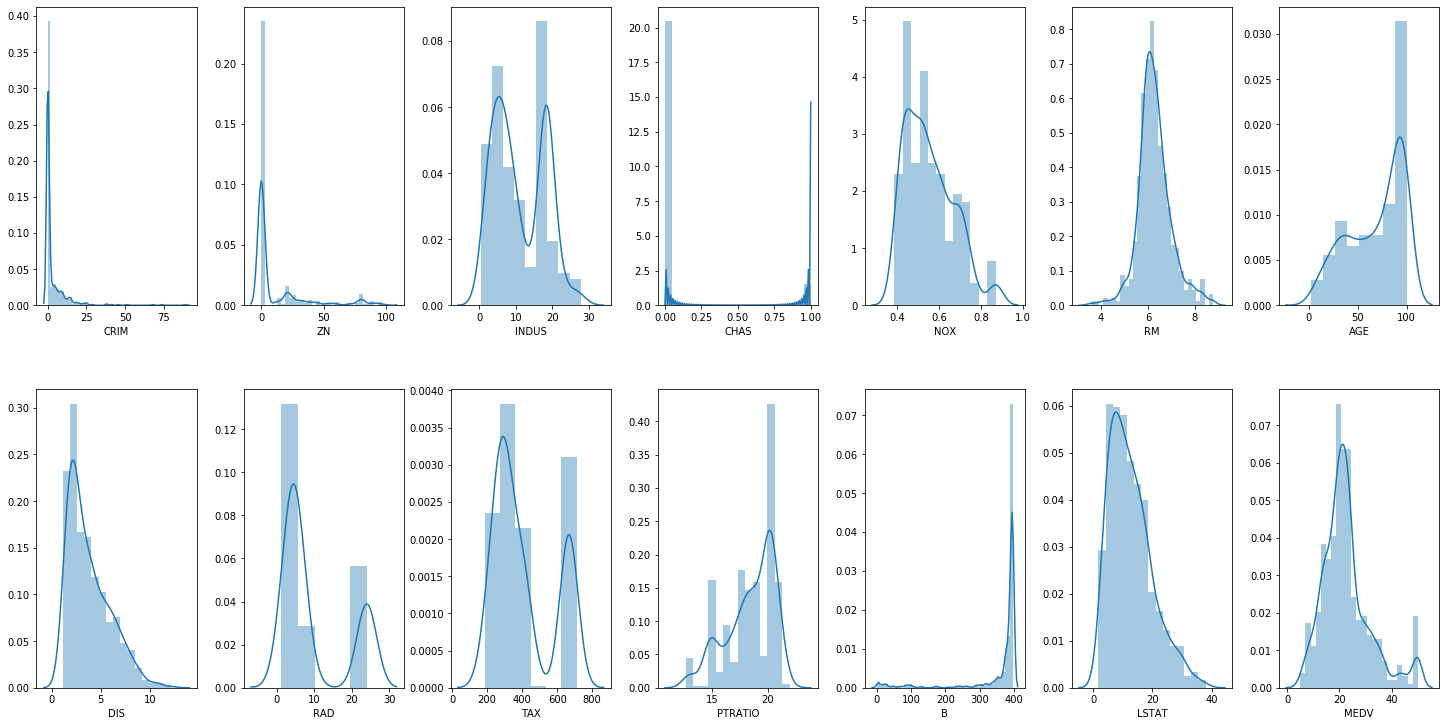

In [15]:
# check distribution of each column

import seaborn as sns

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV.

so we are going to remove data (>50) of MEDV column.

In [45]:
# remove data that grater than 50 in the MEDV column
df_data = df_data[~(df_data['MEDV'] >= 50.0)]
print(np.shape(df_data))

(490, 14)


another way of checking how data is distributed by visualization

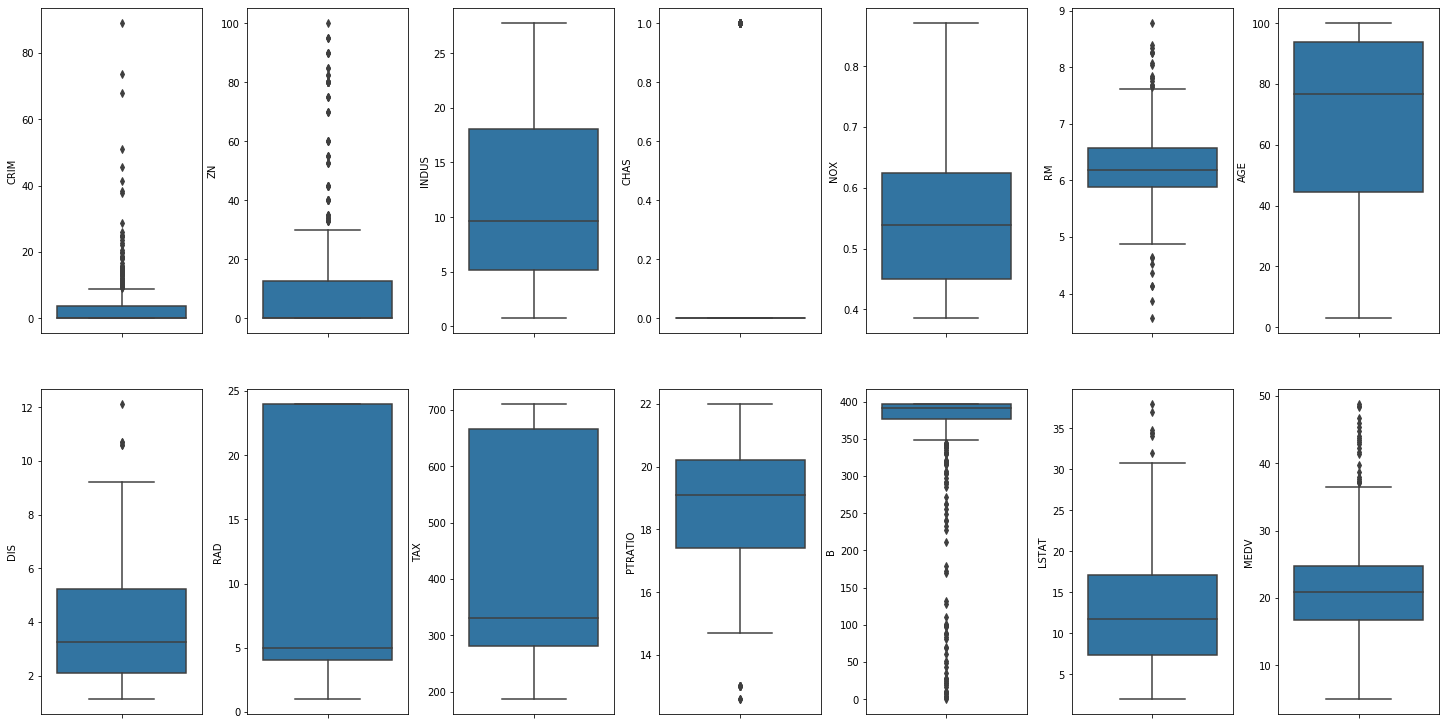

In [46]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_data.items():
    sns.boxplot(y=k, data=df_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Now we are going to see how columns are correlated between each other

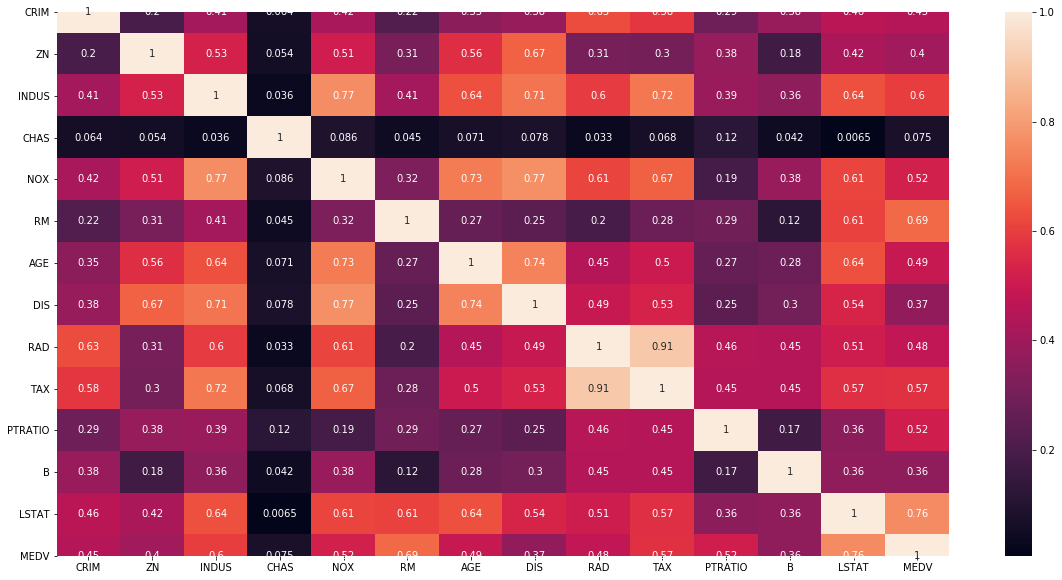

In [61]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_data.corr().abs(),  annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. So to avoid colieararility, we only pick one of them for the model since both RAD and TAX have mid-high correlation with our label column MEDV. Hence, here we pick TAX.

The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.



Now we are going to do standarization on columns except 'MEDV'


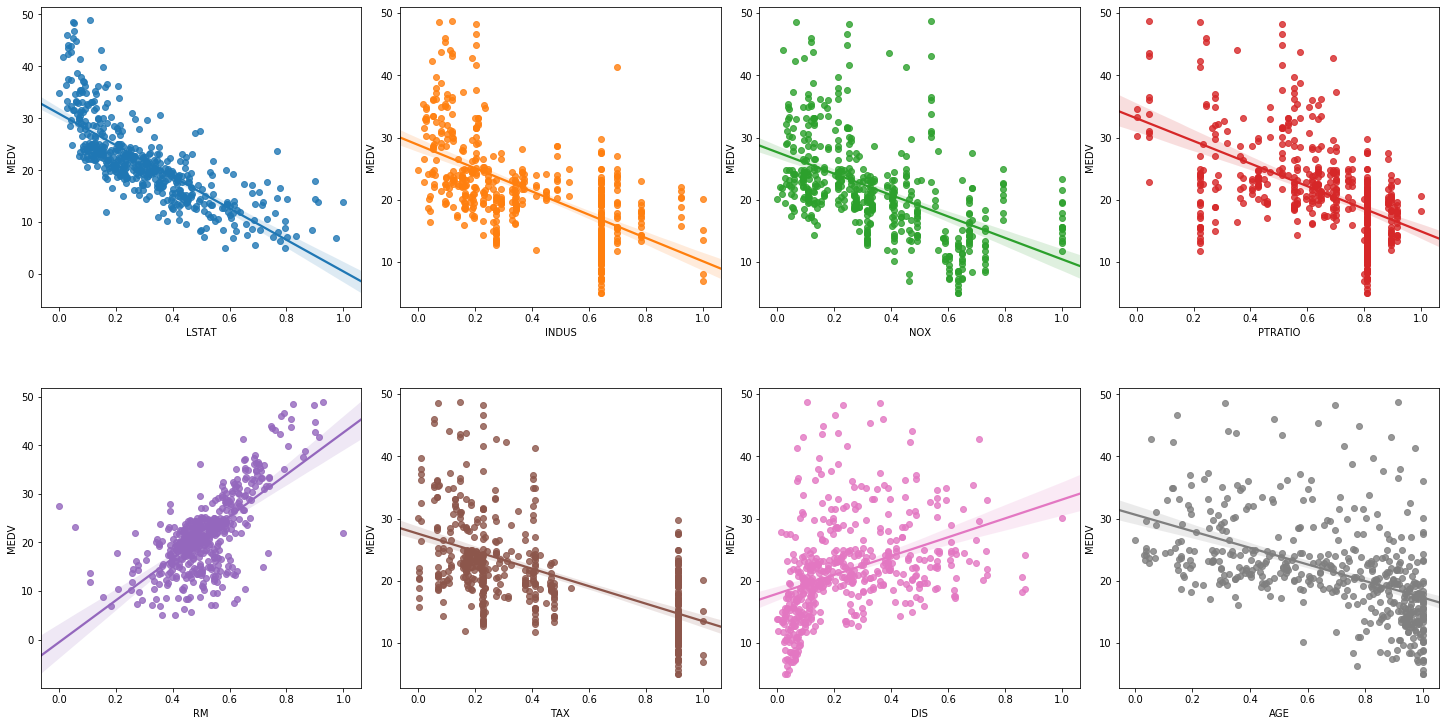

In [88]:
from sklearn.preprocessing import MinMaxScaler

column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
feature = df_data.loc[:,column_sels]
label = df_data['MEDV']
feature = pd.DataFrame(data=min_max_scaler.fit_transform(feature), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=label, x=feature[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

remove skewness of these columns

In [109]:
label =  np.log1p(label)
for col in feature.columns:
    if np.abs(feature[col].skew()) > 0.3:
        feature[col] = np.log1p(feature[col])
        

In [112]:
feature.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.074198,0.056520,0.241923,0.203054,0.577505,0.159645,0.193507,0.338312
1,0.154209,0.210621,0.147927,0.311052,0.547998,0.090881,0.232383,0.375857
2,0.052514,0.210621,0.147927,0.311052,0.694386,0.090881,0.232383,0.325702
3,0.025652,0.051960,0.130976,0.340430,0.658555,0.060769,0.273861,0.271411
4,0.081820,0.051960,0.130976,0.340430,0.687105,0.060769,0.273861,0.302760


In [113]:
label.head()

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: MEDV, dtype: float64

In [114]:
from sklearn.model_selection import train_test_split # splitting dataset
from sklearn.model_selection import cross_val_score # cross validation

In [115]:
# split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=0)

In [149]:
# try the simpliest model Linear regression first
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


kf = KFold(n_splits=10)

lr = LinearRegression()
lr.fit(scale_X_train, y_train)
y_predict = lr.predict(scale_X_test)
scores = cross_val_score(lr, feature, label, cv=kf, scoring='neg_mean_squared_error')

In [150]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.04)


In [151]:
# try ridge regression
lr_ridge = Ridge()
lr_ridge.fit(scale_X_train, y_train)
y_predict = lr.predict(scale_X_test)
scores = cross_val_score(lr_ridge, feature, label, cv=kf, scoring='neg_mean_squared_error')

In [152]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.04)


So, linear regression w/ ridge are not quite different based on results of MSE.

let's conduct other regression models such as SVR, DT, RF, GB etc.

In [153]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [154]:
svr = SVR()
svr.fit(scale_X_train, y_train)
y_predict = svr.predict(scale_X_test)
scores = cross_val_score(svr, feature, label, cv=kf, scoring='neg_mean_squared_error')

In [155]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.05)


In [156]:
dt = DecisionTreeRegressor()
dt.fit(scale_X_train, y_train)
y_predict = dt.predict(scale_X_test)
scores = cross_val_score(dt, feature, label, cv=kf, scoring='neg_mean_squared_error')

In [157]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.07 (+/- 0.05)


In [158]:
rf = RandomForestRegressor()
rf.fit(scale_X_train, y_train)
y_predict = rf.predict(scale_X_test)
scores = cross_val_score(rf, feature, label, cv=kf, scoring='neg_mean_squared_error')

In [159]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.03)


In [160]:
gb = GradientBoostingRegressor()
gb.fit(scale_X_train, y_train)
y_predict = gb.predict(scale_X_test)
scores = cross_val_score(gb, feature, label, cv=kf, scoring='neg_mean_squared_error')

In [161]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.03)


Based on four set of results above, we can see RandomForest and GradientBoosting are performaing better than rest of two.

We pick one model and further conduct fine tuning.

Here we are going to pick gradient boosting.

In [162]:
from sklearn.model_selection import GridSearchCV

In [164]:
param_test = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=kf)
gsearch.fit(feature,label)
gsearch.best_params_, gsearch.best_score_

({'max_depth': 7, 'min_samples_split': 200}, -0.03654176555071708)

In [167]:
gb = GradientBoostingRegressor(max_depth=7, min_samples_split=200)
gb.fit(scale_X_train, y_train)
y_predict_gb = gb.predict(scale_X_test)
scores = cross_val_score(gb, feature, label, cv=kf, scoring='neg_mean_squared_error')

In [168]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.03)


In [192]:
df1 = pd.DataFrame(y_test)

In [193]:
df1

,MEDV
246,3.230804
183,3.511545
453,2.933857
336,3.020425
15,3.039749
...,...
22,2.785011
68,2.912351
20,2.681022
465,3.039749


In [194]:
df2=pd.DataFrame(y_predict_gb)
df2

,0
0,3.087667
1,3.405305
2,2.925130
3,3.020259
4,3.012483
...,...
142,2.883778
143,3.024094
144,2.733410
145,3.056515


In [201]:
df2.columns=['MEDV_predict']

In [202]:
df2

,MEDV_predict
0,3.087667
1,3.405305
2,2.925130
3,3.020259
4,3.012483
...,...
142,2.883778
143,3.024094
144,2.733410
145,3.056515


In [215]:
df1_new = df1.reset_index(drop='index')

In [221]:
result = pd.concat([df1_new, df2], axis=1, sort=False)

In [222]:
result

,MEDV,MEDV_predict
0,3.230804,3.087667
1,3.511545,3.405305
2,2.933857,2.925130
3,3.020425,3.020259
4,3.039749,3.012483
...,...,...
142,2.785011,2.883778
143,2.912351,3.024094
144,2.681022,2.733410
145,3.039749,3.056515


In [223]:
diff = result['MEDV_predict']-result['MEDV']

In [224]:
diff

0     -0.143137
1     -0.106240
2     -0.008726
3     -0.000166
4     -0.027266
         ...   
142    0.098767
143    0.111744
144    0.052388
145    0.016765
146   -0.015101
Length: 147, dtype: float64

In [225]:
result=pd.concat([result, diff],sort=False, axis=1)

In [226]:
result

,MEDV,MEDV_predict,0
0,3.230804,3.087667,-0.143137
1,3.511545,3.405305,-0.106240
2,2.933857,2.925130,-0.008726
3,3.020425,3.020259,-0.000166
4,3.039749,3.012483,-0.027266
...,...,...,...
142,2.785011,2.883778,0.098767
143,2.912351,3.024094,0.111744
144,2.681022,2.733410,0.052388
145,3.039749,3.056515,0.016765


In [227]:
result.columns=['MEDV','MEDV_predict','Difference']

In [228]:
result

,MEDV,MEDV_predict,Difference
0,3.230804,3.087667,-0.143137
1,3.511545,3.405305,-0.106240
2,2.933857,2.925130,-0.008726
3,3.020425,3.020259,-0.000166
4,3.039749,3.012483,-0.027266
...,...,...,...
142,2.785011,2.883778,0.098767
143,2.912351,3.024094,0.111744
144,2.681022,2.733410,0.052388
145,3.039749,3.056515,0.016765


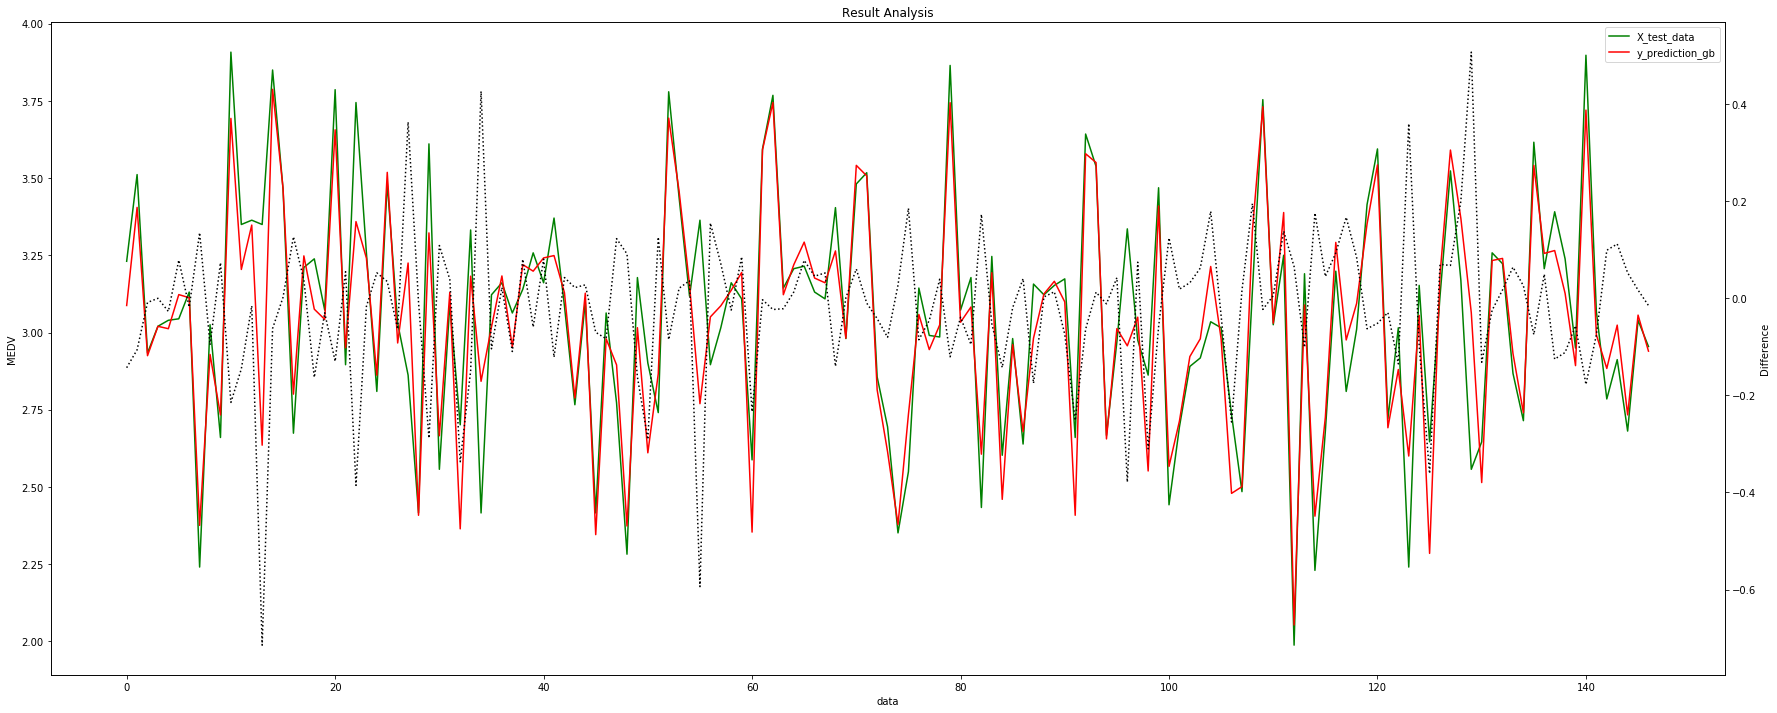

<Figure size 432x288 with 0 Axes>

In [247]:
raw_data =result['MEDV']
pred_data =result['MEDV_predict']
diff = result['Difference']

plt.figure(figsize=(30, 12))

plt.title('Result Analysis')

plt.plot(raw_data, color = 'green', label = 'X_test_data')
plt.plot(pred_data, color = 'red',label = 'y_prediction_gb' )

plt.legend()

plt.xlabel('data')
plt.ylabel('MEDV')

plt.twinx()
plt.plot(result['Difference'],color = "Black",linestyle = "dotted",label = "Difference")
plt.ylabel("Difference")

plt.show()
plt.savefig("1.png", dpi =600)
